In [324]:
import random
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [325]:
# %run ./func.ipynb
# %run ./func_v2.ipynb
# %run ./func_v3.ipynb
# %run ./func_v3-1.ipynb
%run ./func_v3-2.ipynb
# %run ./func_v4.ipynb

In [326]:
D, J = 20,20

# a side of the grid
num_rows_columns = 50
demand_points, candidate_sites = generate_instance(num_rows_columns, D, J, seed=42)

print("Demand Points:")
print(demand_points)

print("\nCandidate Sites:")
print(candidate_sites)

Demand Points:
[(36, 18), (9, 18), (44, 10), (46, 8), (25, 24), (22, 16), (35, 49), (11, 35), (29, 36), (42, 45), (24, 1), (31, 12), (43, 9), (39, 22), (26, 33), (4, 34), (22, 3), (11, 38), (12, 34), (33, 25)]

Candidate Sites:
[(11, 5), (35, 36), (9, 16), (48, 10), (50, 22), (49, 35), (30, 35), (19, 49), (17, 38), (29, 42), (39, 48), (1, 1), (36, 4), (12, 50), (47, 22), (17, 22), (11, 19), (48, 31), (48, 23), (38, 20)]


In [327]:
alpha = 0
beta = 0.1

p = 4
r = 4

h_i = np.full(D, 1 / D)

# 既存のリーダーの施設セット J_L を仮定
J_L = {}  # インデックスとして候補施設の一部を選択
J_F = {}


In [328]:
distances = compute_distances(demand_points, candidate_sites)
print("\nDistances:", distances)

# w_ij の計算
wij_matrix = compute_wij_matrix(distances, alpha, beta)
print("\nw_ij Matrix:", wij_matrix)

# U_i^L の計算
Ui_L = compute_Ui_L(wij_matrix, J_L)
print("\nU_i^L:", Ui_L)

# U_i^F の計算
Ui_F = compute_Ui_F(wij_matrix, J_F)
print("\nU_i^F:", Ui_F)


Distances: [[28.17800561 18.02775638 27.07397274 14.4222051  14.56021978 21.40093456
  18.02775638 35.35533906 27.58622845 25.         30.14962686 38.91015292
  14.         40.         11.70469991 19.41648784 25.01999201 17.69180601
  13.          2.82842712]
 [13.15294644 31.6227766   2.         39.81205847 41.19465985 43.46262762
  27.01851217 32.57299495 21.54065923 31.2409987  42.42640687 18.78829423
  30.41381265 32.14031736 38.20994635  8.94427191  2.23606798 41.10960958
  39.3192065  29.06888371]
 [33.37663854 27.51363298 35.51056181  4.         13.41640786 25.49509757
  28.65309756 46.32493929 38.89730068 35.34119409 38.32753579 43.93176527
  10.         51.2249939  12.36931688 29.54657341 34.20526275 21.37755833
  13.60147051 11.66190379]
 [35.12833614 30.08321791 37.85498646  2.82842712 14.56021978 27.16615541
  31.38470965 49.09175083 41.72529209 38.01315562 40.60788101 45.54119015
  10.77032961 54.03702434 14.03566885 32.20248438 36.68787266 23.08679276
  15.13274595 14.42

In [329]:
x0 = np.random.rand(len(candidate_sites))  # 例: 初期値
y0 = np.random.rand(len(candidate_sites))  # 同じ次元

In [330]:
final_x, final_y, hist_obj, hist_dx, hist_dy = minmax_solver(x0, y0, wij_matrix, Ui_L, Ui_F, h_i, p, r)

[Iter 1]  L_cont=0.532574,  dx=1.77e+00,  dy=2.72e+00
[Iter 2]  L_cont=0.572290,  dx=1.18e+00,  dy=1.61e+00
[Iter 3]  L_cont=0.536133,  dx=1.04e+00,  dy=2.17e+00
[Iter 4]  L_cont=0.550927,  dx=7.97e-01,  dy=1.50e+00
[Iter 5]  L_cont=0.530292,  dx=9.54e-01,  dy=1.03e+00
[Iter 6]  L_cont=0.547994,  dx=9.43e-01,  dy=1.04e+00
[Iter 7]  L_cont=0.531459,  dx=9.13e-01,  dy=1.04e+00
[Iter 8]  L_cont=0.548113,  dx=9.12e-01,  dy=1.04e+00
[Iter 9]  L_cont=0.531487,  dx=9.12e-01,  dy=1.04e+00
[Iter 10]  L_cont=0.548119,  dx=9.12e-01,  dy=1.04e+00
[Iter 11]  L_cont=0.531489,  dx=9.12e-01,  dy=1.04e+00
[Iter 12]  L_cont=0.548119,  dx=9.12e-01,  dy=1.04e+00
[Iter 13]  L_cont=0.531489,  dx=9.12e-01,  dy=1.04e+00
[Iter 14]  L_cont=0.548119,  dx=9.12e-01,  dy=1.04e+00
[Iter 15]  L_cont=0.531489,  dx=9.12e-01,  dy=1.04e+00
[Iter 16]  L_cont=0.548119,  dx=9.12e-01,  dy=1.04e+00
[Iter 17]  L_cont=0.531489,  dx=9.12e-01,  dy=1.04e+00
[Iter 18]  L_cont=0.548119,  dx=9.12e-01,  dy=1.04e+00
[Iter 19]  L_cont=0

KeyboardInterrupt: 

In [ ]:
print("\nFinal x values:" ,final_x)
print("\nFinal y values:" ,final_y)
print("\nhistory of objrct:" ,hist_obj)


Final x values: [0.00000000e+00 0.00000000e+00 3.79122125e-17 6.26666368e-01
 1.57911813e-17 0.00000000e+00 6.09110941e-02 1.17498301e-17
 1.00000000e+00 5.61732371e-02 2.56249300e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
 1.11022302e-16 0.00000000e+00 0.00000000e+00 1.00000000e+00]

Final y values: [0.00000000e+00 1.00000000e+00 2.41885590e-04 0.00000000e+00
 2.02917298e-17 1.55090188e-17 9.39088906e-01 2.13478675e-17
 0.00000000e+00 4.48900334e-18 1.17287340e-17 2.51839407e-18
 1.00000000e+00 0.00000000e+00 6.06692085e-02 0.00000000e+00
 1.00000000e+00 0.00000000e+00 1.38777878e-17 0.00000000e+00]

history of objrct: [0.5253805268481752, 0.503805969864697, 0.5158599918799532, 0.5195743726853629, 0.5206896326893167, 0.5262492115305104, 0.5034908162143973, 0.5337263675070222, 0.5475343470181769, 0.4982404589403634, 0.5197494350743918, 0.5197494350743918, 0.5197494350743918, 0.5197494350743918, 0.5197494350743918, 0.5197494350743918]


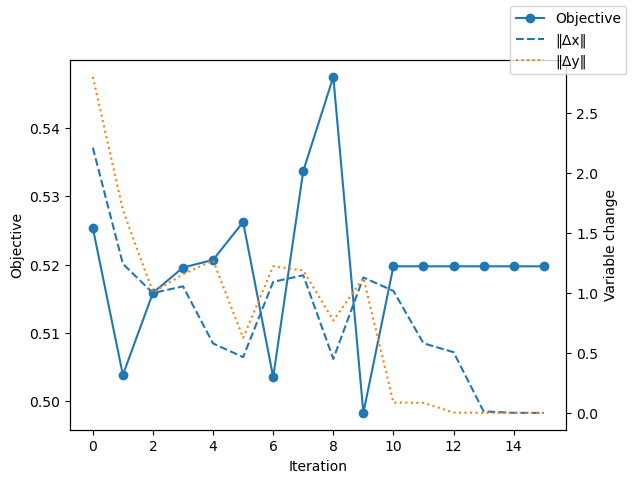

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(hist_obj, label='Objective', marker='o')
ax2 = ax1.twinx()
ax2.plot(hist_dx,  label='‖Δx‖',  ls='--')
ax2.plot(hist_dy,  label='‖Δy‖',  ls=':')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Objective')
ax2.set_ylabel('Variable change')
fig.legend(loc='upper right')
plt.show()